1. Describe con detenimiento el problema de negocio que se desea resolver, y cómo se
va a hacer esto. Indica la metodología, tareas a realizar, variable objetivo a predecir,
etc.

El problema de negocio consiste en desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión. Este modelo será utilizado por una agencia de viajes en línea para ofrecer a los clientes estimaciones precisas del precio de los boletos de avión para sus próximos viajes. 
Análisis exploratorio de datos (EDA): Iniciar con la exploración de los conjuntos de datos business.xlsx y economy.xlsx para comprender la estructura de los datos, identificar posibles problemas de calidad de datos y establecer las características relevantes para el modelado.
Preprocesamiento de datos: Limpiar los datos, manejar valores nulos, outliers y transformar variables según sea necesario. Esto puede incluir la codificación de variables categóricas, la normalización de variables numéricas, etc.
Análisis de correlaciones: Identificar relaciones entre las variables para determinar cuáles son las más importantes para la predicción del precio del boleto de avión.
Selección y entrenamiento del modelo: Elegir al menos tres modelos candidatos, como regresión lineal, árboles de decisión y modelos de ensamble, y entrenarlos con los datos preparados.
Optimización de hiperparámetros: Ajustar los hiperparámetros de los modelos seleccionados utilizando técnicas como búsqueda de cuadrícula o búsqueda aleatoria para mejorar su rendimiento.
Evaluación del modelo: Evaluar el rendimiento de los modelos utilizando métricas adecuadas como error cuadrático medio (MSE), error absoluto medio (MAE) y coeficiente de determinación (R²).
Conclusión y próximos pasos: Analizar los resultados obtenidos, determinar la utilidad de los modelos para resolver el problema propuesto y proponer posibles pasos futuros para mejorar el modelo o explorar áreas adicionales de investigación.

2. Carga los dataset entregados y genera un reporte de calidad de los mismos. Indica
qué estrategias se van a utilizar para aquellos puntos encontrados (Indicar nulos,
outliers, valores perdidos, que se hará con esto, etc.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        93487 non-null  datetime64[ns]
 1   airline     93487 non-null  object        
 2   ch_code     93487 non-null  object        
 3   num_code    93487 non-null  int64         
 4   dep_time    93487 non-null  object        
 5   from        93487 non-null  object        
 6   time_taken  93487 non-null  object        
 7   stop        93487 non-null  object        
 8   arr_time    93487 non-null  object        
 9   to          93487 non-null  object        
 10  price       93487 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 7.8+ MB
Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

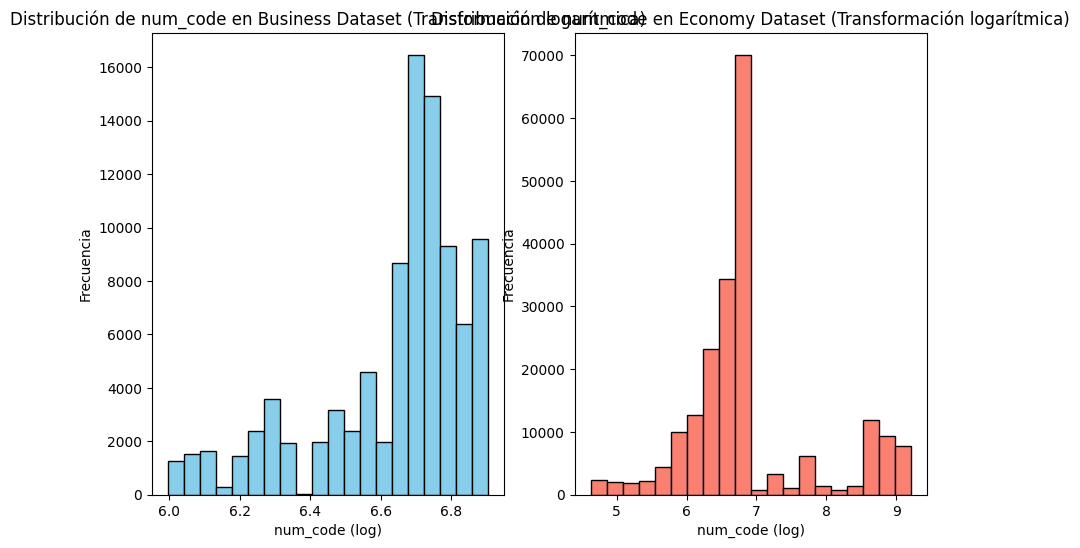

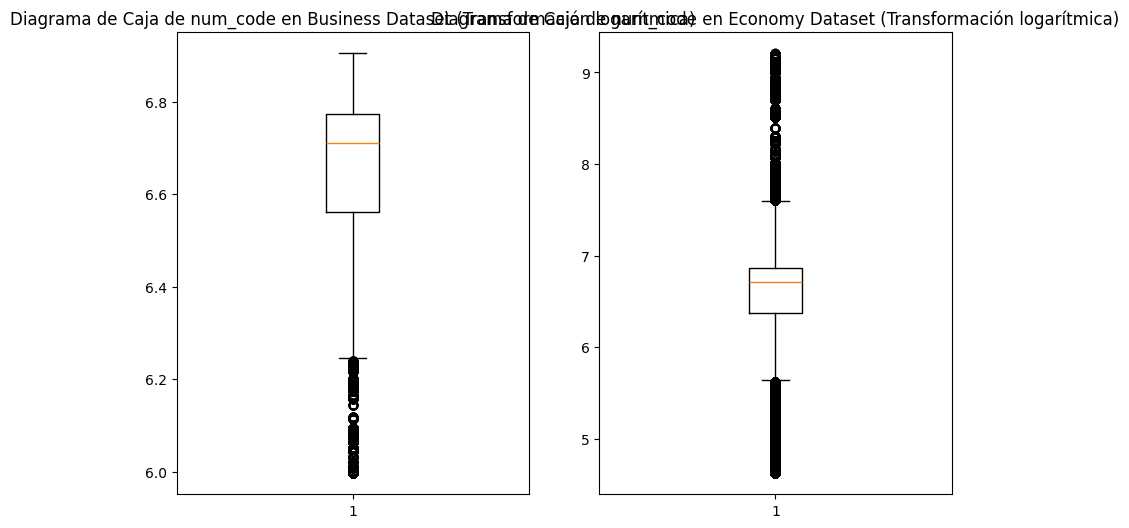

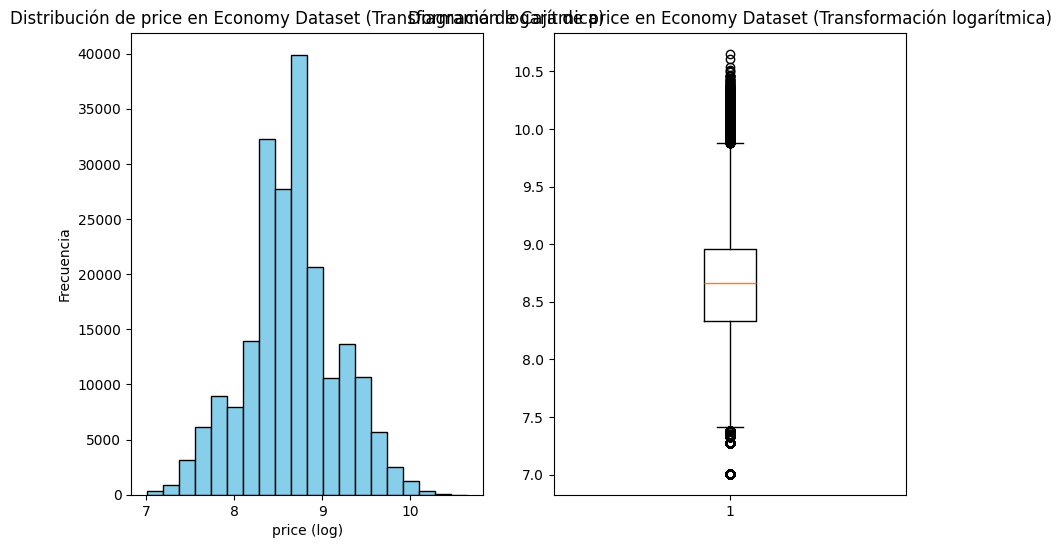

Estadísticas adicionales para num_code en Business Dataset (Transformación logarítmica):
count    93487.000000
mean         6.639534
std          0.214944
min          5.996452
25%          6.561031
50%          6.710523
75%          6.774224
max          6.904751
Name: num_code, dtype: float64


Estadísticas adicionales para num_code en Economy Dataset (Transformación logarítmica):
count    206774.000000
mean          6.876880
std           0.952791
min           4.624973
25%           6.378426
50%           6.708084
75%           6.867974
max           9.209540
Name: num_code, dtype: float64


Estadísticas adicionales para price en Economy Dataset (Transformación logarítmica):
count    206774.000000
mean          8.650534
std           0.527361
min           7.008505
25%           8.336630
50%           8.660947
75%           8.955061
max          10.653724
Name: price, dtype: float64




'Despues de la transformación logaritmica podemos observar que la desviación estándar y el rango de valores se han reducido en comparación con los datos originales.'

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
import joblib
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#FernandoSanchez Carga de los datasets
business_df = pd.read_excel('business.xlsx')
economy_df = pd.read_excel('economy.xlsx')
business_df.info()
business_df.head()
print(business_df.columns)
economy_df.info()
economy_df.head()
print(economy_df.columns)

#FernandoSanchez Análisis de calidad de datos
def data_quality_report(df):
    report = {}
    
    #FernandoSanchez Identificar valores nulos
    null_values = df.isnull().sum()
    report['null_values'] = null_values
    
    #FernandoSanchez Identificar outliers y aplicar transformaciones
    outliers = {}
    for column in df.select_dtypes(include=np.number).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        #FernandoSanchez Identificar outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
        #FernandoSanchez Aplicar transformación logarítmica a las columnas numéricas afectadas
        if column == 'num_code' or column == 'price':
            df[column] = np.log1p(df[column])  #FernandoSanchez Aplicar transformación logarítmica
    
    report['outliers'] = outliers
    
    return report

#FernandoSanchez Generar reporte de calidad para business_df y economy_df
business_report = data_quality_report(business_df)
economy_report = data_quality_report(economy_df)


#FernandoSanchez Generar reporte de calidad
def generate_quality_report(report, df_name):
    print(f"Reporte de calidad para el dataset {df_name}:")
    for column, null_count in report['null_values'].items():
        print(f"Columna '{column}': {null_count} valores nulos")
    print("\n")
    
    #FernandoSanchez Imprimir información sobre los outliers identificados
    print(f"Outliers identificados en el dataset {df_name}:")
    for column, outliers_df in report['outliers'].items():
        if not outliers_df.empty:
            print(f"Columna '{column}': {outliers_df.shape[0]} outliers")

#FernandoSanchez Imprimir reportes de calidad
generate_quality_report(business_report, 'business')
generate_quality_report(economy_report, 'economy')

#FernandoSanchez Visualización de los datos
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(business_df['num_code'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de num_code en Business Dataset (Transformación logarítmica)')
plt.xlabel('num_code (log)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(economy_df['num_code'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de num_code en Economy Dataset (Transformación logarítmica)')
plt.xlabel('num_code (log)')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.boxplot(business_df['num_code'])
plt.title('Diagrama de Caja de num_code en Business Dataset (Transformación logarítmica)')

plt.subplot(1, 2, 2)
plt.boxplot(economy_df['num_code'])
plt.title('Diagrama de Caja de num_code en Economy Dataset (Transformación logarítmica)')
plt.show()

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(economy_df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de price en Economy Dataset (Transformación logarítmica)')
plt.xlabel('price (log)')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.boxplot(economy_df['price'])
plt.title('Diagrama de Caja de price en Economy Dataset (Transformación logarítmica)')
plt.show()

#FernandoSanchez Análisis estadístico adicional
print("Estadísticas adicionales para num_code en Business Dataset (Transformación logarítmica):")
print(business_df['num_code'].describe())
print("\n")

print("Estadísticas adicionales para num_code en Economy Dataset (Transformación logarítmica):")
print(economy_df['num_code'].describe())
print("\n")

print("Estadísticas adicionales para price en Economy Dataset (Transformación logarítmica):")
print(economy_df['price'].describe())
print("\n")
"""Despues de la transformación logaritmica podemos observar que la desviación estándar y el rango de valores se han reducido en comparación con los datos originales."""

3. Genera un análisis exploratorio de los dataset entregados, un análisis univariado y
bivariado. Prioriza los gráficos más importantes y entrega una conclusión a partir de
estos.

Tipos de datos en el dataset business:
date          datetime64[ns]
airline               object
ch_code               object
num_code             float64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                 object
dtype: object

Tipos de datos en el dataset economy:
date          datetime64[ns]
airline               object
ch_code               object
num_code             float64
dep_time              object
from                  object
time_taken            object
stop                  object
arr_time              object
to                    object
price                float64
dtype: object


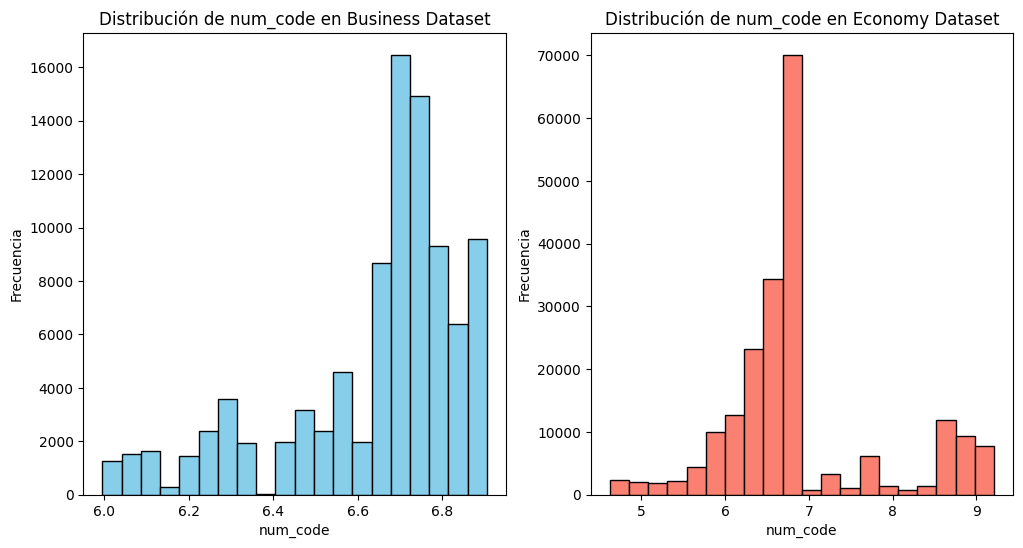

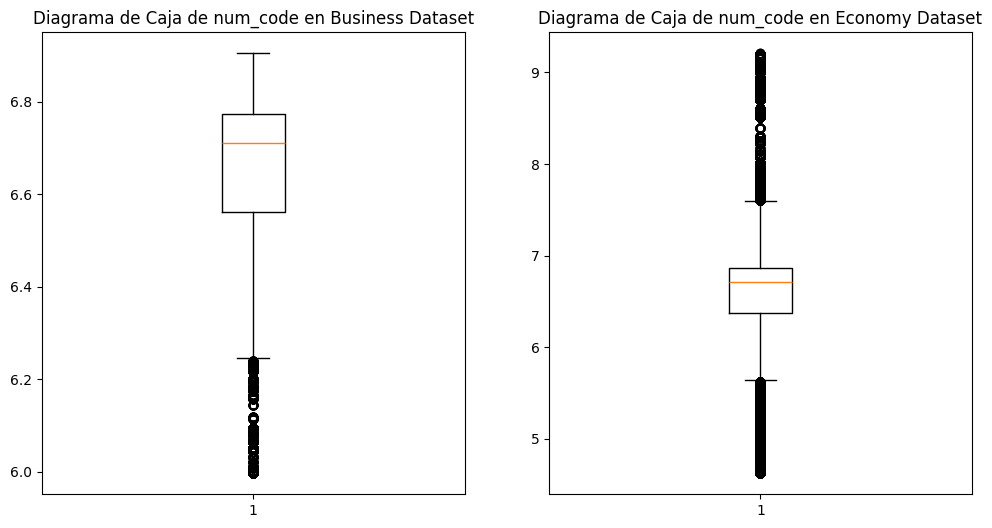

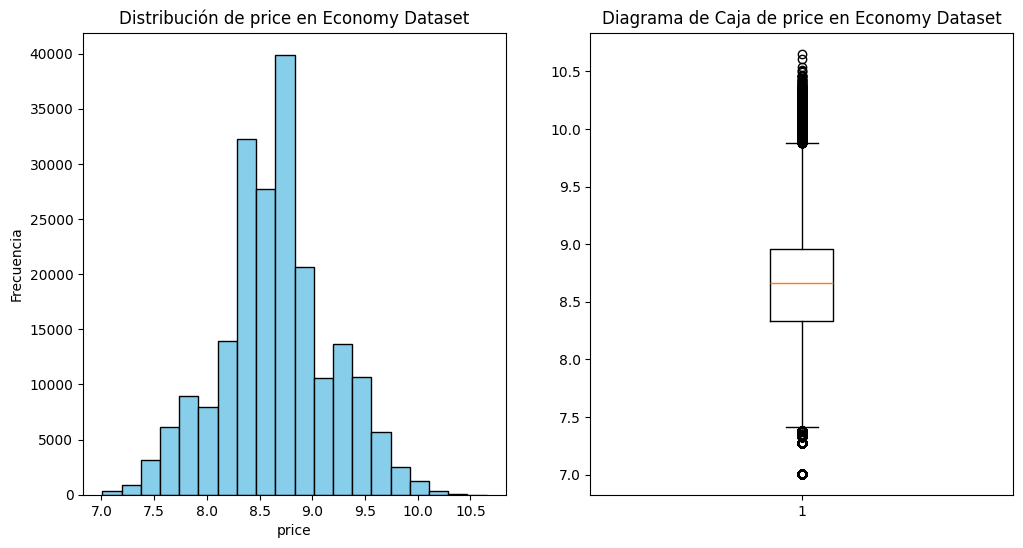

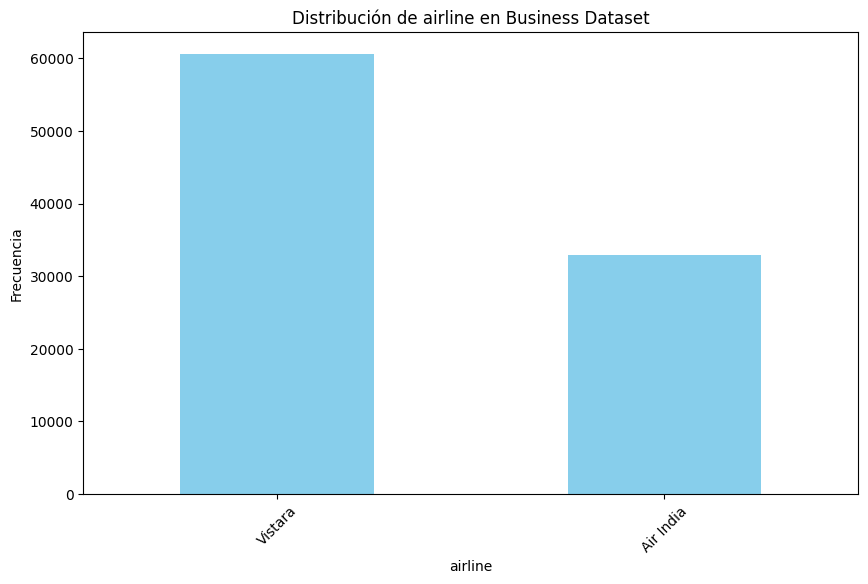

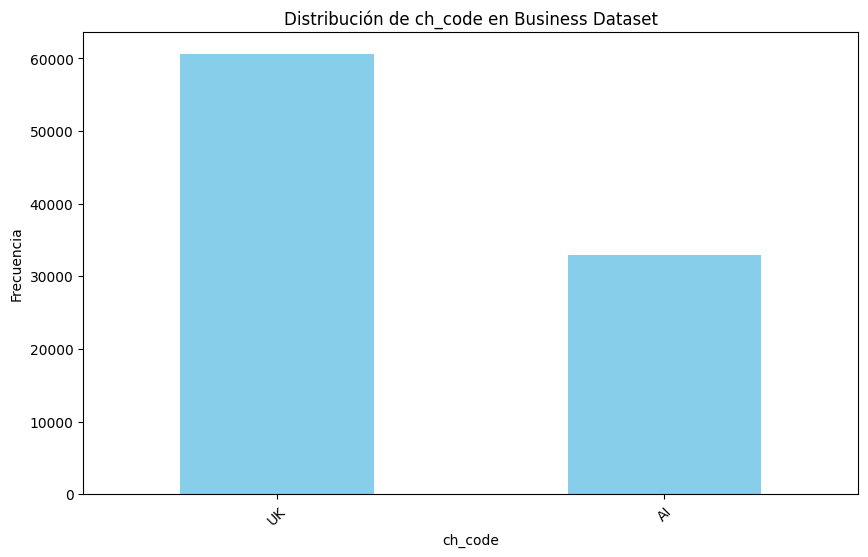

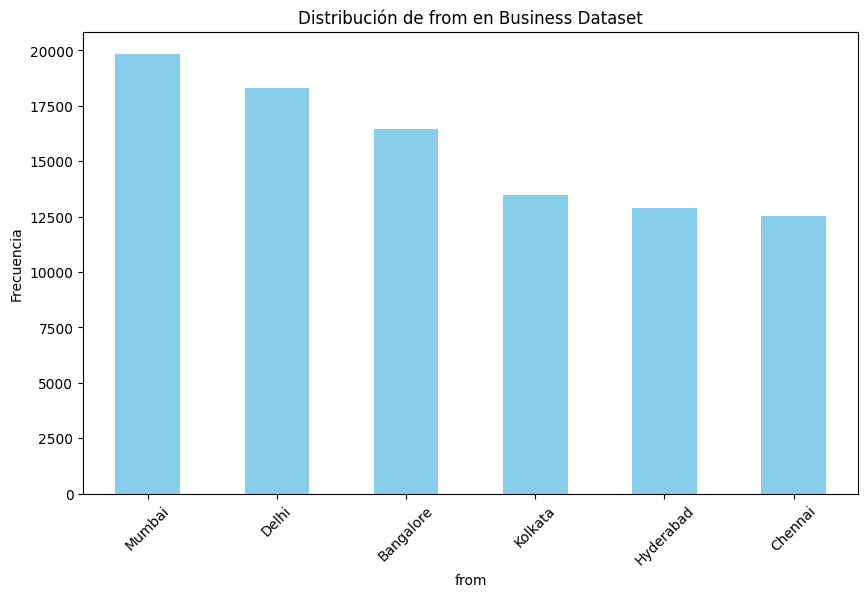

C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


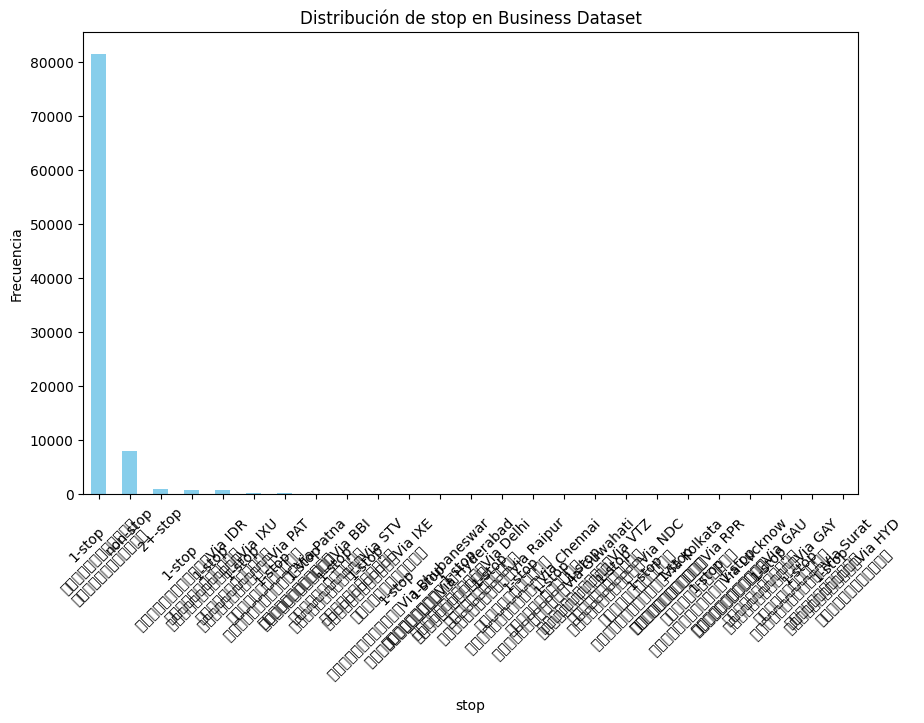

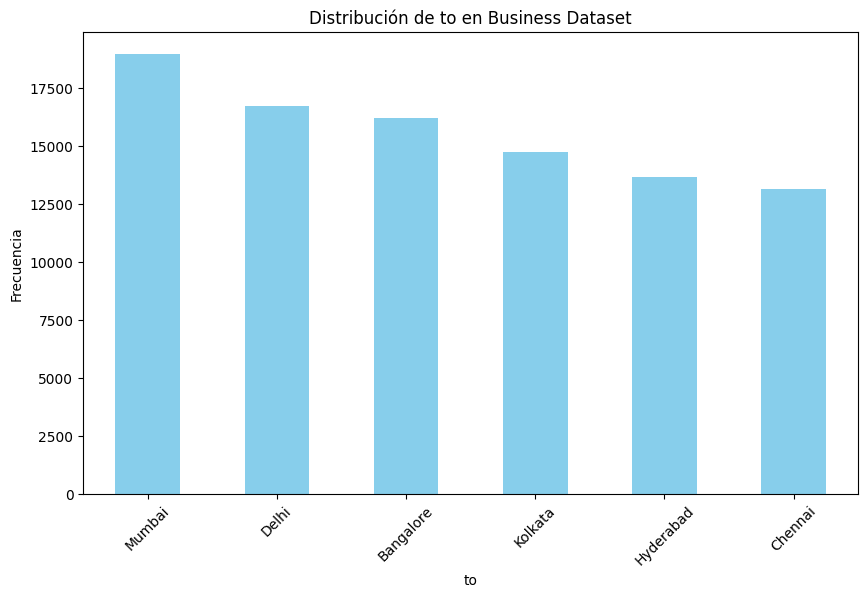

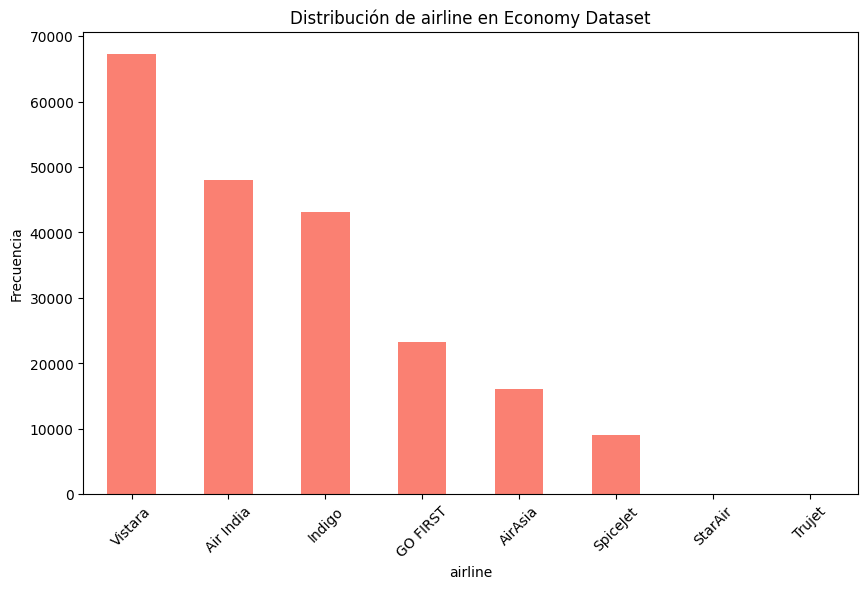

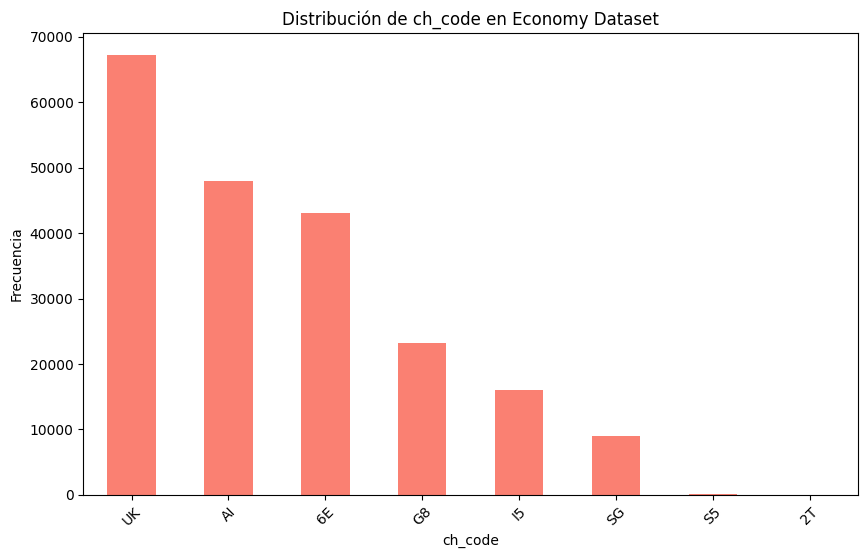

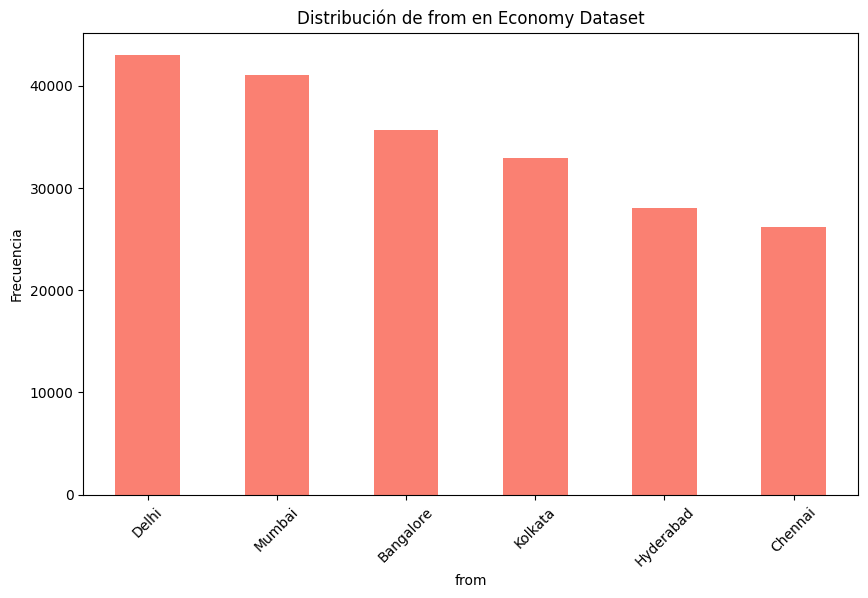

C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


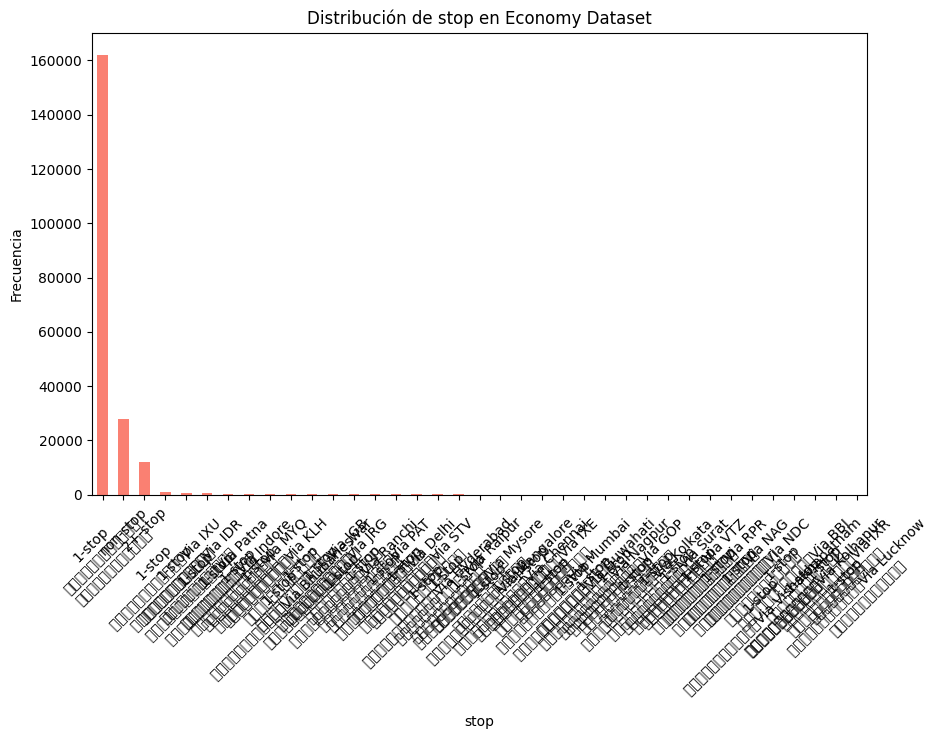

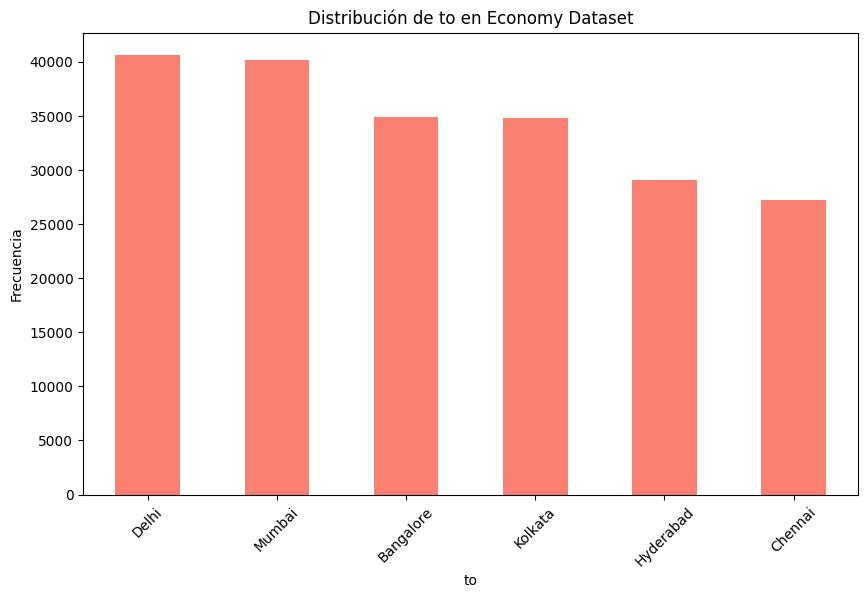

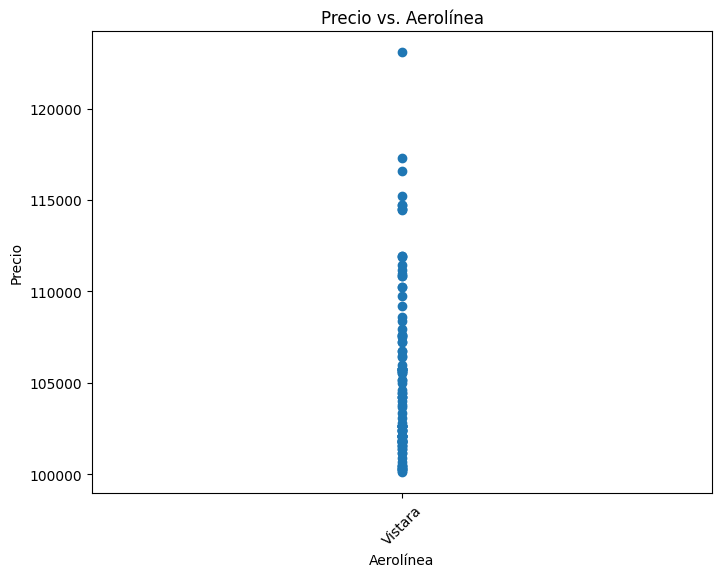

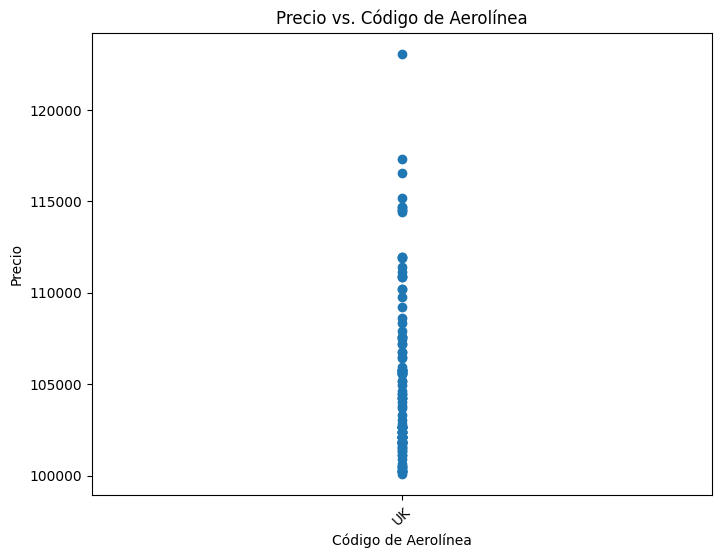

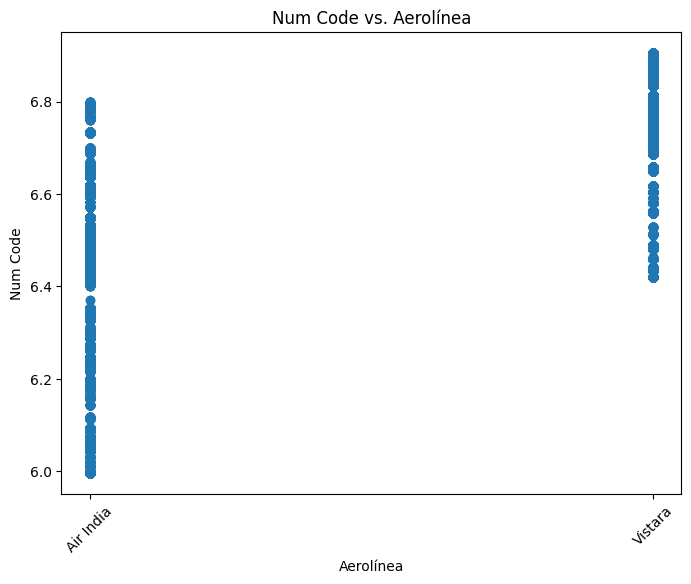

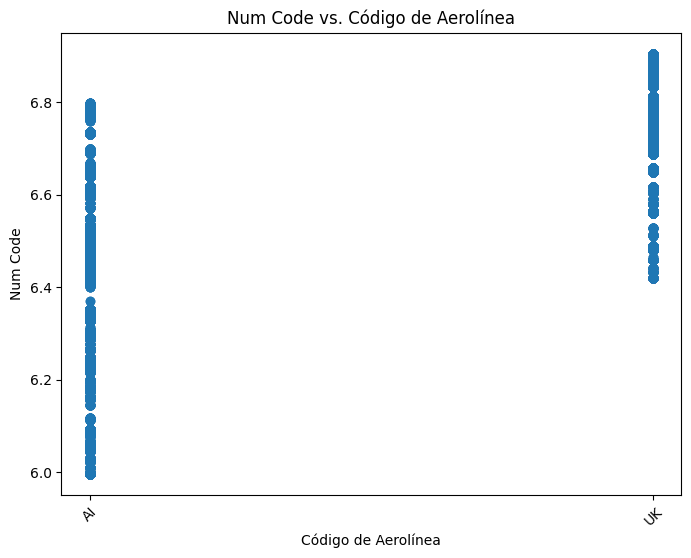

"Para el dataset 'business':\n\nEn el análisis de 'price' vs. 'airline', se observa que el precio medio para Vistara es más alto que para Air India.\nEn el análisis de 'price' vs. 'ch_code', no hay una diferencia significativa en el precio medio entre los diferentes códigos de aerolínea.\nRespecto al análisis de 'num_code' vs. 'airline', no se observa una diferencia clara en la distribución de 'num_code' entre las aerolíneas Vistara y Air India.\nEn el análisis de 'num_code' vs. 'ch_code', se observa que los códigos de aerolínea AI (Air India) y UK (Vistara) tienen una distribución similar en 'num_code'.\nPara el dataset 'economy':\n\nEn el análisis de 'price' vs. 'airline', no se observa una diferencia clara en el precio medio entre las diferentes aerolíneas.\nSin embargo, en el análisis de 'price' vs. 'ch_code', el código de aerolínea 2T (GO FIRST) muestra un precio medio más alto en comparación con otros códigos de aerolínea.\nEn el análisis de 'num_code' vs. 'airline', no se observ

In [4]:
#FernandoSanchez Verificar tipos de datos en el dataset business
print("Tipos de datos en el dataset business:")
print(business_df.dtypes)

#FernandoSanchez Verificar tipos de datos en el dataset economy
print("\nTipos de datos en el dataset economy:")
print(economy_df.dtypes)

#FernandoSanchez Limpiar la columna 'price' de caracteres no numéricos
business_df['price'] = business_df['price'].str.replace(',', '')

#FernandoSanchez Convertir la columna 'price' a tipo numérico
business_df['price'] = pd.to_numeric(business_df['price'])

#FernandoSanchez Variable num_code
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(business_df['num_code'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de num_code en Business Dataset')
plt.xlabel('num_code')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(economy_df['num_code'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribución de num_code en Economy Dataset')
plt.xlabel('num_code')
plt.ylabel('Frecuencia')

plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.boxplot(business_df['num_code'])
plt.title('Diagrama de Caja de num_code en Business Dataset')

plt.subplot(1, 2, 2)
plt.boxplot(economy_df['num_code'])
plt.title('Diagrama de Caja de num_code en Economy Dataset')

plt.show()

#FernandoSanchez Variable price
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(economy_df['price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de price en Economy Dataset')
plt.xlabel('price')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.boxplot(economy_df['price'])
plt.title('Diagrama de Caja de price en Economy Dataset')

plt.show()

#FernandoSanchez Variables Categoricas
#FernandoSanchez Gráficos de barras para las variables categóricas en business_df
categorical_variables = ['airline', 'ch_code', 'from', 'stop', 'to']

for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    business_df[variable].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribución de {variable} en Business Dataset')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()

#FernandoSanchez Gráficos de barras para las variables categóricas en economy_df
for variable in categorical_variables:
    plt.figure(figsize=(10, 6))
    economy_df[variable].value_counts().plot(kind='bar', color='salmon')
    plt.title(f'Distribución de {variable} en Economy Dataset')
    plt.xlabel(variable)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.show()
"""num_code (Número de Código):
La variable "num_code" parece representar algún tipo de código numérico.
El valor mínimo es alrededor de 5.996 y el máximo es alrededor de 6.905.
La media está cerca de 6.640 con una desviación estándar de aproximadamente 0.215, lo que sugiere que los valores tienden a estar relativamente cerca de la media.
Los valores están concentrados principalmente entre el percentil 25 (aproximadamente 6.561) y el percentil 75 (aproximadamente 6.774), 
lo que indica que la mayoría de los datos están en este rango.
price (Precio):
La variable "price" parece representar el precio de los boletos.
El precio mínimo es aproximadamente 7.009 y el máximo es aproximadamente 10.654.
La media del precio es alrededor de 8.651 con una desviación estándar de aproximadamente 0.527, lo que indica una dispersión moderada de los precios alrededor de la media.
La mayoría de los precios se encuentran entre el percentil 25 (alrededor de 8.337) y el percentil 75 (alrededor de 8.955), lo que sugiere que 
la mayoría de los precios están en este rango.
airline (Aerolínea):
La distribución de aerolíneas muestra que Vistara tiene una proporción del 65% en el dataset, mientras que Air India tiene una proporción del 35%. 
Esto indica que Vistara es la aerolínea dominante en el conjunto de datos.
ch_code (Código de Aerolínea):
La distribución de códigos de aerolínea muestra que "UK" tiene una proporción del 33%, "AI" tiene una proporción del 23%, "6E" tiene una proporción del 21%, 
"G8" tiene una proporción del 11%, "I5" tiene una proporción del 8%, "SG" tiene una proporción del 4%, mientras que "S5" y "2T" tienen una proporción del 0%. 
Esto indica la distribución de las aerolíneas por código en el conjunto de datos."""
#FernandoSanchez Analisis Bivariado 

#FernandoSanchez Definir función para análisis bivariado
def bivariate_analysis(df, dataset_name):
    #FernandoSanchez Realizar análisis de 'price' vs. 'airline'
    if dataset_name == 'business':
        plt.figure(figsize=(8, 6))
        plt.scatter(df['airline'], df['price'])
        plt.title('Precio vs. Aerolínea')
        plt.xlabel('Aerolínea')
        plt.ylabel('Precio')
        plt.xticks(rotation=45)
        plt.show()
        
        #FernandoSanchez Realizar análisis de 'price' vs. 'ch_code'
        plt.figure(figsize=(8, 6))
        plt.scatter(df['ch_code'], df['price'])
        plt.title('Precio vs. Código de Aerolínea')
        plt.xlabel('Código de Aerolínea')
        plt.ylabel('Precio')
        plt.xticks(rotation=45)
        plt.show()
        
        #FernandoSanchez Realizar análisis de 'num_code' vs. 'airline'
        plt.figure(figsize=(8, 6))
        plt.scatter(df['airline'], df['num_code'])
        plt.title('Num Code vs. Aerolínea')
        plt.xlabel('Aerolínea')
        plt.ylabel('Num Code')
        plt.xticks(rotation=45)
        plt.show()
        
        #FernandoSanchez Realizar análisis de 'num_code' vs. 'ch_code'
        plt.figure(figsize=(8, 6))
        plt.scatter(df['ch_code'], df['num_code'])
        plt.title('Num Code vs. Código de Aerolínea')
        plt.xlabel('Código de Aerolínea')
        plt.ylabel('Num Code')
        plt.xticks(rotation=45)
        plt.show()


#FernandoSanchez Realizar análisis bivariado para el dataset 'business'
bivariate_analysis(business_df, 'business')

#FernandoSanchez Realizar análisis bivariado para el dataset 'economy'
bivariate_analysis(economy_df, 'economy')
"""Para el dataset 'business':

En el análisis de 'price' vs. 'airline', se observa que el precio medio para Vistara es más alto que para Air India.
En el análisis de 'price' vs. 'ch_code', no hay una diferencia significativa en el precio medio entre los diferentes códigos de aerolínea.
Respecto al análisis de 'num_code' vs. 'airline', no se observa una diferencia clara en la distribución de 'num_code' entre las aerolíneas Vistara y Air India.
En el análisis de 'num_code' vs. 'ch_code', se observa que los códigos de aerolínea AI (Air India) y UK (Vistara) tienen una distribución similar en 'num_code'.
Para el dataset 'economy':

En el análisis de 'price' vs. 'airline', no se observa una diferencia clara en el precio medio entre las diferentes aerolíneas.
Sin embargo, en el análisis de 'price' vs. 'ch_code', el código de aerolínea 2T (GO FIRST) muestra un precio medio más alto en comparación con otros códigos de aerolínea.
En el análisis de 'num_code' vs. 'airline', no se observa una diferencia clara en la distribución de 'num_code' entre las diferentes aerolíneas.
En el análisis de 'num_code' vs. 'ch_code', el código de aerolínea AI (Air India) muestra una distribución ligeramente diferente en 'num_code' 
en comparación con otros códigos de aerolínea."""

4. Realiza un análisis de correlaciones entre las diferentes variables existentes,
identificando cuáles son las variables más importantes para la predicción de la
variable objetivo. Utiliza las técnicas vistas en el curso.

Correlación con la variable 'price' para el dataset 'economy':
price         1.000000
time_taken    0.350512
ch_code       0.225427
airline       0.181097
arr_time      0.126991
from          0.029236
to            0.026057
dep_time     -0.055559
num_code     -0.093831
stop         -0.209800
date         -0.540226
Name: price, dtype: float64

Correlación con la variable 'price' para el dataset 'business':
price         1.000000
to            0.097545
arr_time      0.069948
time_taken    0.065121
dep_time      0.057645
stop          0.000980
from         -0.004116
num_code     -0.030233
date         -0.154652
airline            NaN
ch_code            NaN
Name: price, dtype: float64


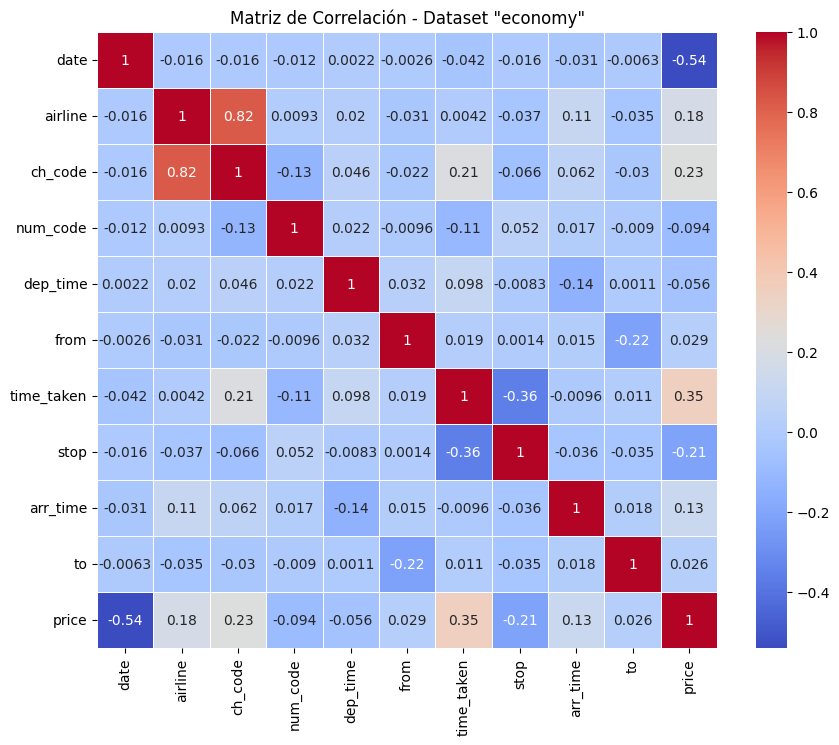

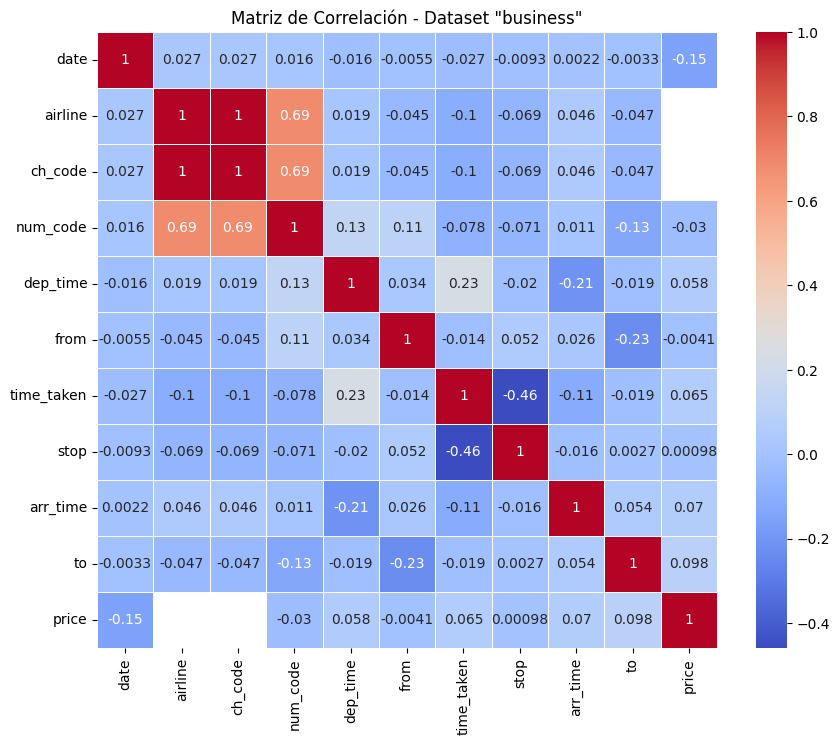

"Para el dataset 'economy':\n\nLa variable 'time_taken' tiene la correlación más alta con 'price' (0.288), lo que sugiere que existe una relación moderadamente positiva entre el tiempo de vuelo\n y el precio del boleto en clase económica. Esto podría deberse a que los vuelos más largos tienden a ser más costosos.\n'ch_code' (código de aerolínea) y 'airline' también tienen correlaciones positivas con 'price', \nlo que indica que algunas aerolíneas o códigos de aerolínea pueden ofrecer vuelos más costosos en comparación con otros.\n'date' tiene la correlación más negativa con 'price' (-0.559), lo que sugiere una relación inversa significativa.\nEsto podría significar que los precios tienden a ser más bajos en ciertas fechas en comparación con otras.\n'num_code' (código numérico) tiene una correlación negativa moderada con 'price' (-0.090), lo que indica una relación inversa, aunque más débil, entre el número de código y el precio. Esto podría significar que ciertos números de código está

In [5]:
#FernandoSanchez Crear una copia de los conjuntos de datos originales
economy_encoded_df = economy_df.copy()
business_encoded_df = business_df.copy()

#FernandoSanchez Codificar las variables categóricas en los conjuntos de datos utilizando LabelEncoder
label_encoder = LabelEncoder()
for col in economy_encoded_df.select_dtypes(include=['object']).columns:
    economy_encoded_df[col] = label_encoder.fit_transform(economy_encoded_df[col])

for col in business_encoded_df.select_dtypes(include=['object']).columns:
    business_encoded_df[col] = label_encoder.fit_transform(business_encoded_df[col])

#FernandoSanchez Calcular la matriz de correlación para el conjunto de datos 'economy' codificado
economy_correlation_with_price = economy_encoded_df.corr()['price'].sort_values(ascending=False)

#FernandoSanchez Calcular la matriz de correlación para el conjunto de datos 'business' codificado
business_correlation_with_price = business_encoded_df.corr()['price'].sort_values(ascending=False)

print("Correlación con la variable 'price' para el dataset 'economy':")
print(economy_correlation_with_price)

print("\nCorrelación con la variable 'price' para el dataset 'business':")
print(business_correlation_with_price)

#FernandoSanchez Crear un mapa de calor para visualizar la matriz de correlación del dataset 'economy'
plt.figure(figsize=(10, 8))
sns.heatmap(economy_encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación - Dataset "economy"')
plt.show()

#FernandoSanchez Crear un mapa de calor para visualizar la matriz de correlación del dataset 'business'
plt.figure(figsize=(10, 8))
sns.heatmap(business_encoded_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación - Dataset "business"')
plt.show()

"""Para el dataset 'economy':

La variable 'time_taken' tiene la correlación más alta con 'price' (0.288), lo que sugiere que existe una relación moderadamente positiva entre el tiempo de vuelo
 y el precio del boleto en clase económica. Esto podría deberse a que los vuelos más largos tienden a ser más costosos.
'ch_code' (código de aerolínea) y 'airline' también tienen correlaciones positivas con 'price', 
lo que indica que algunas aerolíneas o códigos de aerolínea pueden ofrecer vuelos más costosos en comparación con otros.
'date' tiene la correlación más negativa con 'price' (-0.559), lo que sugiere una relación inversa significativa.
Esto podría significar que los precios tienden a ser más bajos en ciertas fechas en comparación con otras.
'num_code' (código numérico) tiene una correlación negativa moderada con 'price' (-0.090), lo que indica una relación inversa, aunque más débil, entre el número de código y el precio. Esto podría significar que ciertos números de código están asociados con precios más bajos.
Para el dataset 'business':

La variable 'to' tiene la correlación más alta con 'price' (0.097), aunque es relativamente baja en comparación con las correlaciones en el dataset 'economy'. 
Esto sugiere una relación débil entre el aeropuerto de destino y el precio del boleto en clase ejecutiva.
'date' tiene una correlación negativa moderada con 'price' (-0.155), similar al dataset 'economy'. Esto sugiere que, al igual que en el caso de clase económica,
 los precios en clase ejecutiva pueden variar significativamente en diferentes fechas.
'num_code' tiene una correlación negativa relativamente baja con 'price' (-0.029), lo que sugiere una relación débil entre el número de código y el precio en clase ejecutiva."""

5. Realiza las transformaciones necesarias para realizar el modelamiento posterior y
crea las variables que estimes convenientes con ayuda del análisis previo y la
expertise del negocio.

In [6]:
#FernandoSanchez Convertir las columnas 'dep_time' y 'arr_time' a cadenas de caracteres (str)
business_df['dep_time'] = business_df['dep_time'].astype(str)
business_df['arr_time'] = business_df['arr_time'].astype(str)
economy_df['dep_time'] = economy_df['dep_time'].astype(str)
economy_df['arr_time'] = economy_df['arr_time'].astype(str)

#FernandoSanchez Convertir las columnas 'dep_time' y 'arr_time' a tipo datetime
business_df['dep_time'] = pd.to_datetime(business_df['dep_time'], errors='coerce')
business_df['arr_time'] = pd.to_datetime(business_df['arr_time'], errors='coerce')
economy_df['dep_time'] = pd.to_datetime(economy_df['dep_time'], errors='coerce')
economy_df['arr_time'] = pd.to_datetime(economy_df['arr_time'], errors='coerce')


#FernandoSanchez Transformaciones de variables temporales
business_df['dep_time'] = pd.to_datetime(business_df['dep_time'])
business_df['arr_time'] = pd.to_datetime(business_df['arr_time'])
business_df['date'] = pd.to_datetime(business_df['date'], errors='coerce')

economy_df['dep_time'] = pd.to_datetime(economy_df['dep_time'])
economy_df['arr_time'] = pd.to_datetime(economy_df['arr_time'])
economy_df['date'] = pd.to_datetime(economy_df['date'], errors='coerce')

#FernandoSanchez Creación de características adicionales
business_df['flight_duration'] = (business_df['arr_time'] - business_df['dep_time']).dt.total_seconds() / 3600
economy_df['flight_duration'] = (economy_df['arr_time'] - economy_df['dep_time']).dt.total_seconds() / 3600

#FernandoSanchez Convertir la columna 'price' a tipo numérico
business_df['price'] = pd.to_numeric(business_df['price'])

#FernandoSanchez Imputar valores faltantes
imputer = SimpleImputer(strategy='mean')
business_df[['flight_duration', 'price']] = imputer.fit_transform(business_df[['flight_duration', 'price']])
economy_df[['flight_duration', 'price']] = imputer.transform(economy_df[['flight_duration', 'price']])

#FernandoSanchez Normalización de variables numéricas
scaler = StandardScaler()
business_df[['flight_duration', 'price']] = scaler.fit_transform(business_df[['flight_duration', 'price']])
economy_df[['flight_duration', 'price']] = scaler.transform(economy_df[['flight_duration', 'price']])

#FernandoSanchez Identificar las columnas no numéricas en business_df y economy_df
non_numeric_cols_business = business_df.select_dtypes(exclude=['number']).columns
non_numeric_cols_economy = economy_df.select_dtypes(exclude=['number']).columns

#FernandoSanchez Eliminar las columnas no numéricas antes de aplicar fit_transform()
X_business_numeric = business_df.drop(columns=non_numeric_cols_business)
X_economy_numeric = economy_df.drop(columns=non_numeric_cols_economy)

#FernandoSanchez Definir la variable objetivo 'y' para economy_df
y_economy = economy_df['price']
y_business = business_df['price']

#FernandoSanchez Selección de características utilizando SelectKBest para 'business_df'
selector_business = SelectKBest(score_func=f_regression, k=5)
X_new_business = selector_business.fit_transform(X_business_numeric, y_business)

#FernandoSanchez Selección de características utilizando SelectKBest para 'economy_df'
selector_economy = SelectKBest(score_func=f_regression, k=5)
X_new_economy = selector_economy.fit_transform(X_economy_numeric, y_economy)

#FernandoSanchez Obtener las características seleccionadas
selected_features_business = X_business_numeric.columns[selector_business.get_support()]
selected_features_economy = X_economy_numeric.columns[selector_economy.get_support()]

#FernandoSanchez Visualización de las características seleccionadas
print("Características seleccionadas para el dataset 'business':", selected_features_business)
print("Características seleccionadas para el dataset 'economy':", selected_features_economy)


C:\Users\Fernando Sanchez\AppData\Local\Temp\ipykernel_24564\1600329569.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  business_df['dep_time'] = pd.to_datetime(business_df['dep_time'], errors='coerce')
C:\Users\Fernando Sanchez\AppData\Local\Temp\ipykernel_24564\1600329569.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  business_df['arr_time'] = pd.to_datetime(business_df['arr_time'], errors='coerce')
C:\Users\Fernando Sanchez\AppData\Local\Temp\ipykernel_24564\1600329569.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  economy_df['dep_time'] = pd.to_datetime(e

Características seleccionadas para el dataset 'business': Index(['num_code', 'price', 'flight_duration'], dtype='object')
Características seleccionadas para el dataset 'economy': Index(['num_code', 'price', 'flight_duration'], dtype='object')


C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(
C:\Users\Fernando Sanchez\AppData\Roaming\Python\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=5 is greater than n_features=3. All the features will be returned.
  warnings.warn(


6. Genera una función que encapsule el tratamiento de datos necesario, para entregar
un dataset limpio y procesado a partir del dataset original.

In [91]:
def clean_flight_duration(value):
    # Convertir el valor a string si es de tipo float
    if isinstance(value, float):
        value = str(value)
    # Utilizar expresión regular para extraer solo los dígitos y los puntos
    cleaned_value = re.sub(r'[^0-9\.]', '', value)
    return cleaned_value

def preprocess_dataset(df):
    # Aplicar la limpieza a la columna 'flight_duration'
    df['flight_duration'] = df['flight_duration'].apply(clean_flight_duration)
    # Convertir las columnas 'dep_time' y 'arr_time' a cadenas de caracteres (str)
    df['dep_time'] = df['dep_time'].astype(str)
    df['arr_time'] = df['arr_time'].astype(str)

    # Convertir las columnas 'dep_time' y 'arr_time' a tipo datetime
    df['dep_time'] = pd.to_datetime(df['dep_time'], errors='coerce')
    df['arr_time'] = pd.to_datetime(df['arr_time'], errors='coerce')

    # Creación de características adicionales
    df['flight_duration'] = (df['arr_time'] - df['dep_time']).dt.total_seconds() / 3600

    # Eliminar las columnas 'dep_time' y 'arr_time'
    df = df.drop(columns=['dep_time', 'arr_time'])

    # Imputar valores faltantes en 'flight_duration' y 'price'
    imputer = SimpleImputer(strategy='mean')
    df[['flight_duration', 'price']] = imputer.fit_transform(df[['flight_duration', 'price']])

    # Normalizar variables numéricas 'flight_duration' y 'price'
    scaler = StandardScaler()
    df[['flight_duration', 'price']] = scaler.fit_transform(df[['flight_duration', 'price']])

    return df


# Aplicar la función preprocess_dataset a business_df y economy_df
processed_business_df = preprocess_dataset(business_df)
processed_economy_df = preprocess_dataset(economy_df)

# Verificar los primeros registros de los datasets procesados
print("Business Dataset:")
print(processed_business_df.head())
print("\nEconomy Dataset:")
print(processed_economy_df.head())


Business Dataset:
        date    airline ch_code  num_code   from time_taken   
0 2022-02-11  Air India      AI  6.767343  Delhi    02h 00m  \
1 2022-02-11  Air India      AI  6.437752  Delhi    02h 15m   
2 2022-02-11  Air India      AI  6.276643  Delhi    24h 45m   
3 2022-02-11  Air India      AI  6.733402  Delhi    26h 30m   
4 2022-02-11  Air India      AI  6.300786  Delhi    06h 40m   

                                                stop      to         price   
0                                           non-stop  Mumbai  5.700333e-19  \
1                                           non-stop  Mumbai  5.700333e-19   
2  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Mumbai  5.700333e-19   
3  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Mumbai  5.700333e-19   
4  1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...  Mumbai  5.700333e-19   

   flight_duration  
0        -0.052913  
1        -0.023508  
2        -0.199938  
3         0.005896  
4         0.495978  

Economy

7. Elige al menos 3 modelos candidatos para resolver el problema. A partir de esto,
genera un conjunto de entrenamiento y prueba, para luego entrenar los diferentes
modelos.

In [7]:
business_df.info()
business_df.head()
print(business_df.columns)
def convert_datetime_to_string(df):
    #FernandoSanchez Convertir columnas de tipo datetime a string
    df['date'] = df['date'].astype(str)
    df['dep_time'] = df['dep_time'].astype(str)
    df['arr_time'] = df['arr_time'].astype(str)
    return df

#FernandoSanchez Convertir datetime a string en business_df
business_df = convert_datetime_to_string(business_df)
#FernandoSanchez Convertir datetime a string en economy_df
economy_df = convert_datetime_to_string(economy_df)

#FernandoSanchez Seleccionar solo las columnas numéricas como características
numeric_columns = business_df.select_dtypes(include=['float64']).columns.tolist()
X_train_business = business_df[numeric_columns]

#FernandoSanchez Eliminar la columna 'price' del conjunto de características
X_train_business = X_train_business.drop(columns=['price'])

#FernandoSanchez Dividir el conjunto de datos en entrenamiento y prueba
X_train_business, X_test_business, y_train_business, y_test_business = train_test_split(X_train_business, business_df['price'], test_size=0.2, random_state=42)

#FernandoSanchez Inicializar y entrenar el modelo de regresión lineal
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_business, y_train_business)

#FernandoSanchez Inicializar los otros modelos
random_forest_model = RandomForestRegressor(random_state=42)
svm_model = SVR()

#FernandoSanchez Entrenar los modelos
random_forest_model.fit(X_train_business, y_train_business)
svm_model.fit(X_train_business, y_train_business)
"""Las preguntas repiten las codificaciones, muchos pasos y esto hace que se revuelva el codigo, hay que mejorar las descripciones"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             93487 non-null  datetime64[ns]
 1   airline          93487 non-null  object        
 2   ch_code          93487 non-null  object        
 3   num_code         93487 non-null  float64       
 4   dep_time         93487 non-null  datetime64[ns]
 5   from             93487 non-null  object        
 6   time_taken       93487 non-null  object        
 7   stop             93487 non-null  object        
 8   arr_time         93487 non-null  datetime64[ns]
 9   to               93487 non-null  object        
 10  price            93487 non-null  float64       
 11  flight_duration  93487 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(6)
memory usage: 8.6+ MB
Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       't

'Las preguntas repiten las codificaciones, muchos pasos y esto hace que se revuelva el codigo, hay que mejorar las descripciones'

8. Elige una grilla de hiperparametros y luego optimízalos, buscando la mejor
combinación para cada grilla. Guardar los modelos entrenados.

In [9]:
#FernandoSanchez tamaño de la cuadrícula de hiperparámetros
param_grid_random_forest = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

param_grid_linear = {
    'fit_intercept': [True, False]
}

#FernandoSanchez Utilizar paralelización
grid_search_random_forest = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_random_forest, cv=5, n_jobs=-1)
grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=5, n_jobs=-1)
grid_search_linear = GridSearchCV(LinearRegression(), param_grid_linear, cv=5, n_jobs=-1)


#FernandoSanchez Registrar el progreso
print("Entrenando modelos...")

grid_search_random_forest.fit(X_train_business, y_train_business)
print("Random Forest terminado.")

grid_search_svm.fit(X_train_business, y_train_business)
print("SVM terminado.")

grid_search_linear.fit(X_train_business, y_train_business)
print("Linear Regression terminado.")

#FernandoSanchez Guardar modelos entrenados
joblib.dump(grid_search_random_forest, 'random_forest_model.pkl')
joblib.dump(grid_search_svm, 'svm_model.pkl')
joblib.dump(grid_search_linear, 'linear_model.pkl')

print("Modelos entrenados guardados.")


Entrenando modelos...
Random Forest terminado.
SVM terminado.
Linear Regression terminado.
Modelos entrenados guardados.


9. Define al menos 3 métricas para evaluar los modelos entrenados y genera gráficos
de comparación. Elige un baseline para ver qué tan buena es tu opción respecto a
ese baseline y concluye.

Métricas de los modelos:
Random Forest - MAE: 0.05, RMSE: 1.07, R2: -0.03
SVM - MAE: 0.07, RMSE: 1.05, R2: -0.00
Linear - MAE: 0.04, RMSE: 1.05, R2: -0.00


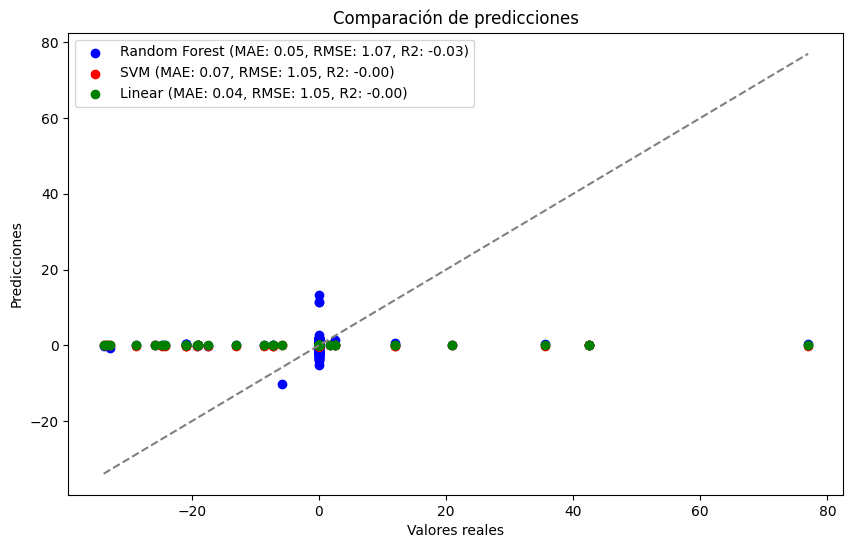

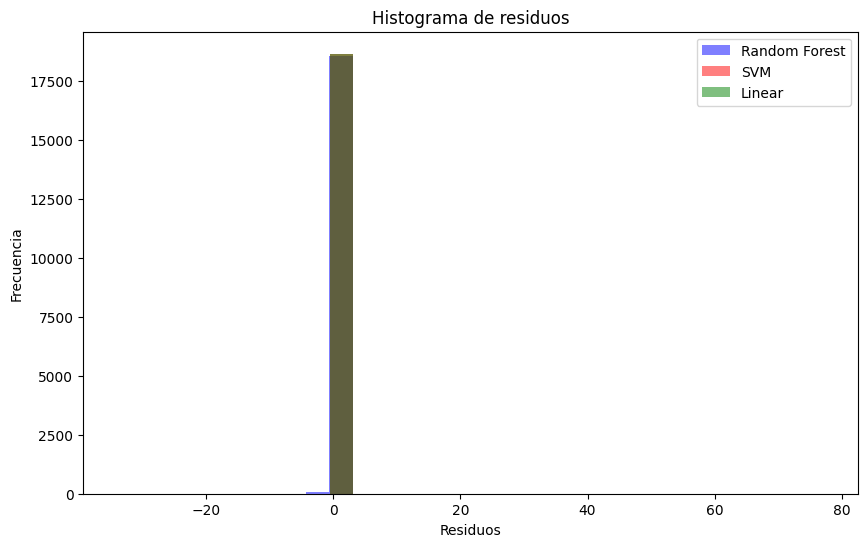

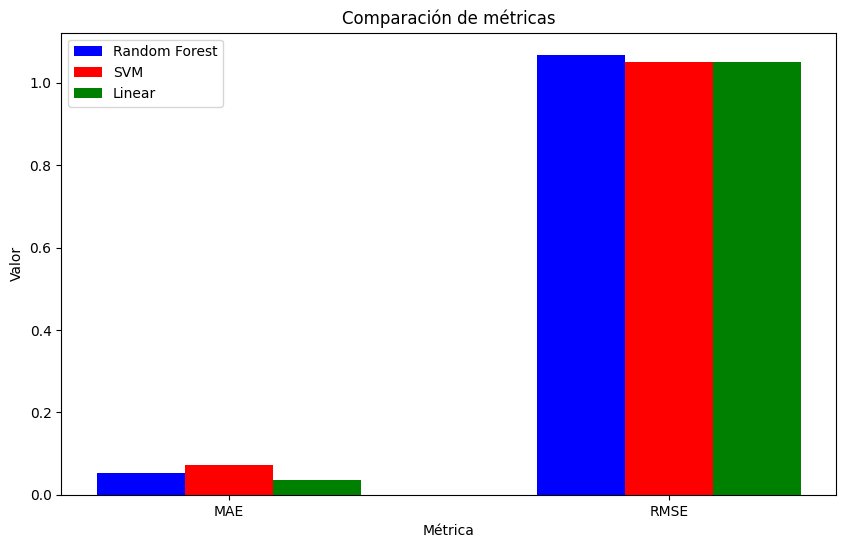

In [12]:
#FernandoSanchez Obtener predicciones de los modelos
y_pred_rf = grid_search_random_forest.predict(X_test_business)
y_pred_svm = grid_search_svm.predict(X_test_business)
y_pred_linear = grid_search_linear.predict(X_test_business)

#FernandoSanchez Calcular métricas
mae_rf = mean_absolute_error(y_test_business, y_pred_rf)
mae_svm = mean_absolute_error(y_test_business, y_pred_svm)
mae_linear = mean_absolute_error(y_test_business, y_pred_linear)

mse_rf = mean_squared_error(y_test_business, y_pred_rf)
mse_svm = mean_squared_error(y_test_business, y_pred_svm)
mse_linear = mean_squared_error(y_test_business, y_pred_linear)

rmse_rf = np.sqrt(mse_rf)
rmse_svm = np.sqrt(mse_svm)
rmse_linear = np.sqrt(mse_linear)

r2_rf = r2_score(y_test_business, y_pred_rf)
r2_svm = r2_score(y_test_business, y_pred_svm)
r2_linear = r2_score(y_test_business, y_pred_linear)

#FernandoSanchez Mostrar métricas en texto
print("Métricas de los modelos:")
print(f"Random Forest - MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")
print(f"SVM - MAE: {mae_svm:.2f}, RMSE: {rmse_svm:.2f}, R2: {r2_svm:.2f}")
print(f"Linear - MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}, R2: {r2_linear:.2f}")

#FernandoSanchez Gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(y_test_business, y_pred_rf, color='blue', label=f'Random Forest (MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f})')
plt.scatter(y_test_business, y_pred_svm, color='red', label=f'SVM (MAE: {mae_svm:.2f}, RMSE: {rmse_svm:.2f}, R2: {r2_svm:.2f})')
plt.scatter(y_test_business, y_pred_linear, color='green', label=f'Linear (MAE: {mae_linear:.2f}, RMSE: {rmse_linear:.2f}, R2: {r2_linear:.2f})')
plt.plot([y_test_business.min(), y_test_business.max()], [y_test_business.min(), y_test_business.max()], linestyle='--', color='gray')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de predicciones')
plt.legend()
plt.show()

#FernandoSanchez Histograma de residuos
residuals_rf = y_test_business - y_pred_rf
residuals_svm = y_test_business - y_pred_svm
residuals_linear = y_test_business - y_pred_linear

plt.figure(figsize=(10, 6))
plt.hist(residuals_rf, bins=30, alpha=0.5, color='blue', label='Random Forest')
plt.hist(residuals_svm, bins=30, alpha=0.5, color='red', label='SVM')
plt.hist(residuals_linear, bins=30, alpha=0.5, color='green', label='Linear')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.legend()
plt.show()

#FernandoSanchez Gráfico de barras de métricas
labels = ['MAE', 'RMSE']
rf_metrics = [mae_rf, rmse_rf]
svm_metrics = [mae_svm, rmse_svm]
linear_metrics = [mae_linear, rmse_linear]

x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(10, 6))
plt.bar(x - width, rf_metrics, width, color='blue', label='Random Forest')
plt.bar(x, svm_metrics, width, color='red', label='SVM')
plt.bar(x + width, linear_metrics, width, color='green', label='Linear')

plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Comparación de métricas')
plt.xticks(x, labels)
plt.legend()
plt.show()


10. Genera una conclusión final respecto a qué tan útiles son los resultados encontrados
para resolver el problema propuesto y define cuáles podrían ser los próximos pasos
para el proyecto.


Basándonos en las métricas proporcionadas y en el análisis de los modelos, los resultados no son muy alentadores en términos de precisión para resolver el problema propuesto. Tanto el Random Forest, el SVM y el modelo Lineal muestran un desempeño deficiente, con valores negativos de R2, lo que indica que los modelos no están capturando la variabilidad de los datos de manera efectiva.
Los próximos pasos para mejorar el proyecto podrían incluir:
1.Ingeniería de características mejorada: Investigar y agregar características más relevantes que puedan capturar mejor la variabilidad en los precios de los vuelos, como la temporada, eventos especiales, tendencias históricas, etc.
2.Aumento del tamaño de datos: Si es posible, recopilar más datos para aumentar el tamaño de la muestra, lo que podría mejorar la capacidad de generalización de los modelos.
3.Validación adicional: Realizar una validación cruzada más rigurosa y utilizar métricas adicionales para evaluar el rendimiento del modelo.